In [2]:
import pandas as pd
import networkx as nx

In [3]:
pd.read_csv('../data/summary.csv', parse_dates=True)

,statistic,value
0,number-of-commits,7472
1,number-of-entities,32005
2,number-of-entities-changed,58612
3,number-of-authors,170


In [4]:
authors_churn = pd.read_csv('../data/authors.csv')

In [47]:
authors_churn

,entity,n-authors,n-revs
0,src/Makefile.am,55,526
1,src/slave/slave.cpp,54,450
2,src/master/master.cpp,50,585
3,include/mesos/mesos.proto,50,188
4,src/master/http.cpp,42,203
5,src/tests/master_tests.cpp,40,214
6,src/master/master.hpp,39,329
7,src/tests/slave_tests.cpp,39,134
8,src/tests/mesos.hpp,36,156
9,src/slave/slave.hpp,34,207


In [ ]:
authors = pd.read_csv('authors.csv')

In [41]:
authors.head()

,entity,n-authors,n-revs
0,main.go,3,31
1,web.go,3,29
2,README.md,3,26
3,marathon/marathon.go,3,22
4,web_test.go,3,19


In [43]:
authors.describe()

,n-authors,n-revs
count,105.000000,105.000000
mean,1.514286,4.142857
std,0.735295,5.570231
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,5.000000
max,3.000000,31.000000


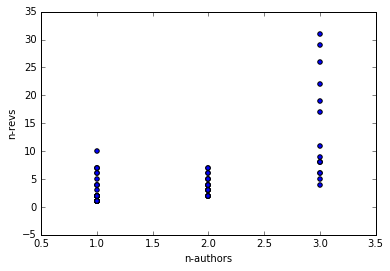

In [24]:
%matplotlib inline
authors.plot(kind='scatter', x='n-authors', y='n-revs');

In [32]:
authors.groupby('n-authors').describe()

n-revs
n-authors                 
1         count  66.000000
          mean    2.045455
          std     1.884608
          min     1.000000
          25%     1.000000
          50%     1.000000
          75%     2.000000
          max    10.000000
2         count  24.000000
          mean    3.791667
          std     1.587428
          min     2.000000
          25%     2.750000
          50%     3.500000
          75%     5.000000
          max     7.000000
3         count  15.000000
          mean   13.933333
          std     9.284908
          min     4.000000
          25%     7.000000
          50%     9.000000
          75%    20.500000
          max    31.000000

In [5]:
communication = pd.read_csv('../data/communication.csv', parse_dates=True)

In [6]:
strength = communication['strength']
communication['normal_strength'] = strength.apply(lambda x: (x - strength.min()) / (strength.max() - strength.min()))

In [7]:
communication['strength'].quantile(.9)

20.0

In [32]:
communication[communication['author'].isin(data[0].head(50))].groupby(['author']).apply(lambda x: list(x.peer)).to_json('../data/data.json')

In [64]:
communication[communication['strength'] > 20].describe()

,shared,average,strength
count,832.000000,832.000000,832.000000
mean,32.850962,116.199519,41.920673
std,47.252115,146.288642,29.275585
min,1.000000,1.000000,21.000000
25%,1.000000,3.000000,23.000000
50%,14.000000,61.000000,27.000000
75%,46.000000,187.500000,43.250000
max,303.000000,746.000000,100.000000


In [10]:
G=nx.from_pandas_dataframe(communication, 'author', 'peer', ['strength'])

In [11]:
pos=nx.spring_layout(G)
edgewidth = [ d['strength'] for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edge_labels(G, pos)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G, pos, edge_color=edgewidth)



UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 11: ordinal not in range(128)

In [179]:
nx.k_nearest_neighbors(G, weight='strength')

{2: 2.0}

In [12]:
nx.pagerank(G, weight='strength')

/home/janisz/anaconda2/lib/python2.7/site-packages/networkx/generators/stochastic.py:56: UserWarning: zero out-degree for node Gabriel Monroy
  warnings.warn('zero out-degree for node %s' % u)
/home/janisz/anaconda2/lib/python2.7/site-packages/networkx/generators/stochastic.py:56: UserWarning: zero out-degree for node weitao zhou
  warnings.warn('zero out-degree for node %s' % u)


{'ASHUTOSH JAIN': 0.0012838029972018364,
 'Aaron Bell': 0.004254588728016053,
 'Abhishek Dasgupta': 0.008520728379951112,
 'Adam B': 0.013197228118714495,
 'Aditi Dixit': 0.00884223171503763,
 'Akanksha Agrawal': 0.0018034049460139898,
 'Alex Clemmer': 0.005961979576862273,
 'Alex Naparu': 0.003686009338910594,
 'Alexander Rojas': 0.011225508898713826,
 'Alexander Rukletsov': 0.01259506128695875,
 'Alexandra Sava': 0.01098858911881367,
 'Anand Mazumdar': 0.0106505100433494,
 'Andrey Dyatlov': 0.0013466757570183999,
 'Andy Konwinski': 0.0085089062961433,
 'Andy Pang': 0.002133366491370539,
 'Anindya Sinha': 0.006330753040892335,
 'Ankur Chauhan': 0.002901644769446062,
 'Anton Lindstr\xc3\xb6m': 0.004473770960312722,
 'Archana kumari': 0.0024611194207013534,
 'Artem Harutyunyan': 0.009197483004702672,
 'Avinash sridharan': 0.012199789369165558,
 'Bartek Plotka': 0.007425818916875776,
 'Ben Mahler': 0.006878674034457637,
 'Benjamin Bannier': 0.009285553721712022,
 'Benjamin Hindman': 0.00

In [15]:
G=nx.from_pandas_dataframe(communication, 'author', 'peer', ['strength'])
d = nx.pagerank(G, weight='strength')

data = pd.DataFrame(d.items()).sort_values(by=1, ascending=False)

In [30]:
communication[communication['author'].isin(data[0].head(50))]

,author,peer,shared,average,strength,normal_strength
165,Abhishek Dasgupta,Kevin Klues,55,102,53,0
200,Michael Park,Isabel Jimenez,123,257,47,0
201,Isabel Jimenez,Michael Park,123,257,47,0
202,Vinod Kone,Benjamin Mahler,255,553,46,0
203,Benjamin Mahler,Vinod Kone,255,553,46,0
204,Tobi Knaup,Bernardo Gomez Palacio,9,20,45,0
208,Kapil Arya,Jie Yu,183,418,43,0
209,Kapil Arya,Benjamin Bannier,270,617,43,0
210,Jie Yu,Kapil Arya,183,418,43,0
211,Benjamin Bannier,Kapil Arya,270,617,43,0
